# ++ Carregar dados históricos da Bovespa em Dataframe para análise ++

In [1]:
from datetime import date, datetime, timedelta
import time
hoje = datetime.today().strftime('%d/%m/%Y')
time.asctime( time.localtime(time.time()) )

'Mon Oct 21 15:17:08 2024'

In [2]:
import pandas as pd
from ipywidgets import IntProgress
import ipywidgets as widgets
import json
from bs4 import BeautifulSoup
pd.__version__

'1.3.4'

In [3]:
from IPython.display import FileLink, FileLinks, display, clear_output, Markdown
FileLink('Resultados.ipynb')

C:\Users\F0435280\OneDrive - Banco do Brasil S.A\Área de Trabalho\Alexandre\StockManager-main\Resultados.ipynb

In [4]:
# Setando opção do Pandas para mostrar todas as linhas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Setando separador de milhar
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
from pacote.functions import *

In [6]:
ano = time.localtime().tm_year
if time.localtime().tm_mon < 3:
    str_ano, str_nov_ant, str_dez_ant = f'A{ano}', f'M11{ano-1}', f'M12{ano-1}'
    LISTA_ARQUIVOS = [str_ano, str_nov_ant, str_dez_ant]
else:
    str_ano = f'A{ano}'
    LISTA_ARQUIVOS = [str_ano]

In [7]:
df = carrega_dados(LISTA_ARQUIVOS)

In [8]:
# Monday is 0 and Sunday is 6.
dia_semana  = datetime.today().weekday()
ajuste_dias = -3 if dia_semana == 0 else -1
dt_esperado_ult = (datetime.today() + timedelta(days=ajuste_dias)).strftime('%Y-%m-%d')
dt_max = str(df["dtPregao"].max()).split()[0]

if dt_esperado_ult == dt_max:
    font_color="alert-success"
    a = "Atualizado!"
else:
    font_color="alert-danger"
    a = "Desatualizado!!! Última data " + str(dt_max)
def printmd(string):
    display(Markdown(string))

In [9]:
#  df_n_dias | vol | col_pc | pc_min | avg_vr_fech

style, layout, max_count, parm_vol = {'description_width':'initial'}, {'width':'400px'}, 7, 6000000
bar = IntProgress(min=0, max=max_count, style=style, layout=layout) # instantiate the bar
display(bar) # display the bar

d25 = monta_tabela(monta_df_periodos(df, 25), parm_vol, '1.0%', 24, 1, bar)
d20 = monta_tabela(monta_df_periodos(df, 20), parm_vol, '1.0%', 19, 1, bar)
d15 = monta_tabela(monta_df_periodos(df, 15), parm_vol, '1.0%', 14, 1, bar)
d10 = monta_tabela(monta_df_periodos(df, 10), parm_vol, '1.0%', 9, 1, bar)
d05 = monta_tabela(monta_df_periodos(df, 5), parm_vol, '1.0%', 5, 1, bar)
d04 = monta_tabela(monta_df_periodos(df, 4), parm_vol, '1.0%', 4, 1, bar)
d03 = monta_tabela(monta_df_periodos(df, 3), parm_vol, '1.0%', 3, 1, bar)
merge1 = pd.merge(d25['cdAcao'], d20['cdAcao'], how ='inner', on =['cdAcao'])
merge2 = pd.merge(merge1, d15['cdAcao'], how ='inner', on =['cdAcao'])
merge3 = pd.merge(merge2, d10['cdAcao'], how ='inner', on =['cdAcao'])
merge_final = pd.merge(merge3, d05['cdAcao'], how ='inner', on =['cdAcao'])
if merge_final.empty:
    merge_final = ">> Sem ações boas em todo o período <<"

IntProgress(value=0, layout=Layout(width='400px'), max=7, style=ProgressStyle(description_width='initial'))

In [10]:
if len(d05) > 5:
    df_button = d05
    print("d05")
elif len(d04) > 5:
    df_button = d04
    print("d04")
else:
    df_button = d03
    print("d03")

button0 = widgets.Button(description=f'{"0-"}{df_button["cdAcao"].iloc[0]}') if df_button["cdAcao"].size > 0 else None
button1 = widgets.Button(description=f'{"1-"}{df_button["cdAcao"].iloc[1]}') if df_button["cdAcao"].size > 1 else None
button2 = widgets.Button(description=f'{"2-"}{df_button["cdAcao"].iloc[2]}') if df_button["cdAcao"].size > 2 else None
button3 = widgets.Button(description=f'{"3-"}{df_button["cdAcao"].iloc[3]}') if df_button["cdAcao"].size > 3 else None
button4 = widgets.Button(description=f'{"4-"}{df_button["cdAcao"].iloc[4]}') if df_button["cdAcao"].size > 4 else None
button5 = widgets.Button(description=f'{"5-"}{df_button["cdAcao"].iloc[5]}') if df_button["cdAcao"].size > 5 else None
button6 = widgets.Button(description=f'{"6-"}{df_button["cdAcao"].iloc[6]}') if df_button["cdAcao"].size > 6 else None
output = widgets.Output()

def on_button_clicked(b):
    with output:
        clear_output()
        index = int(b.description[0])
        display(consulta_acao_formatada(df, df_button['cdAcao'].iloc[index]))

lista_buttons = []
if button0:
    button0.on_click(on_button_clicked)
    lista_buttons.append(button0)
if button1:
    button1.on_click(on_button_clicked)
    lista_buttons.append(button1)
if button2:
    button2.on_click(on_button_clicked)
    lista_buttons.append(button2)
if button3:
    button3.on_click(on_button_clicked)
    lista_buttons.append(button3)
if button4:
    button4.on_click(on_button_clicked)
    lista_buttons.append(button4)
if button5:
    button5.on_click(on_button_clicked)
    lista_buttons.append(button5)
if button6:
    button6.on_click(on_button_clicked)
    lista_buttons.append(button6)

d05


In [11]:
ativos_dividendos_hoje = busca_ativos_dividendos()
ativos_dividendos_hoje

{'ALOS3', 'BMGB4'}

In [12]:
# Setando definição de cores
def color_red_dividend(val):
    color = 'red' if val in ativos_dividendos_hoje else 'black'
    return 'color: %s' % color

In [13]:
d25_format = d25.style.applymap(color_red_dividend, subset=['cdAcao'])
d20_format = d20.style.applymap(color_red_dividend, subset=['cdAcao'])
d15_format = d15.style.applymap(color_red_dividend, subset=['cdAcao'])
d10_format = d10.style.applymap(color_red_dividend, subset=['cdAcao'])
d05_format = d05.style.applymap(color_red_dividend, subset=['cdAcao'])
d04_format = d04.style.applymap(color_red_dividend, subset=['cdAcao'])
d03_format = d03.style.applymap(color_red_dividend, subset=['cdAcao'])
d25_format = d25_format.format({"AvgVol": "{:,.2f}".format,"AvgVrFech": "{:,.2f}".format,"AvgPcAbert": "{:,.2f}".format})
d20_format = d20_format.format({"AvgVol": "{:,.2f}".format,"AvgVrFech": "{:,.2f}".format,"AvgPcAbert": "{:,.2f}".format})
d15_format = d15_format.format({"AvgVol": "{:,.2f}".format,"AvgVrFech": "{:,.2f}".format,"AvgPcAbert": "{:,.2f}".format})
d10_format = d10_format.format({"AvgVol": "{:,.2f}".format,"AvgVrFech": "{:,.2f}".format,"AvgPcAbert": "{:,.2f}".format})
d05_format = d05_format.format({"AvgVol": "{:,.2f}".format,"AvgVrFech": "{:,.2f}".format,"AvgPcAbert": "{:,.2f}".format})
d04_format = d04_format.format({"AvgVol": "{:,.2f}".format,"AvgVrFech": "{:,.2f}".format,"AvgPcAbert": "{:,.2f}".format})
d03_format = d03_format.format({"AvgVol": "{:,.2f}".format,"AvgVrFech": "{:,.2f}".format,"AvgPcAbert": "{:,.2f}".format})

In [14]:
printmd(f'**<div class={font_color}>{hoje}, Arquivo {a}</div>**')

**<div class=alert-success>21/10/2024, Arquivo Atualizado!</div>**

### 25 dias, order by 1%

In [15]:
d25_format if not d25.empty else print('<< Sem ações boas para 25 dias >>')

<< Sem ações boas para 25 dias >>


### 20 dias, order by 1%

In [16]:
d20_format if not d20.empty else print('<< Sem ações boas para 20 dias >>')

<< Sem ações boas para 20 dias >>


### 15 dias, order by 1%

In [17]:
d15_format if not d15.empty else print('<< Sem ações boas para 10 dias >>')

<< Sem ações boas para 10 dias >>


### 10 dias, order by 1%

In [18]:
d10_format if not d10.empty else print('<< Sem ações boas para 10 dias >>')

,cdAcao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,Soma,AvgVol,AvgVrFech,AvgPcAbert
1269,M2ST34,9,9,9,9,8,8,52,"26,701,681.26",15.78,1.61
1565,QUAL3,10,9,9,8,7,5,48,"10,315,337.50",2.15,0.15
110,AMBP3,10,9,9,8,7,4,47,"31,953,897.00",131.81,0.22
1409,NVDC34,10,10,9,7,5,5,46,"122,584,027.61",15.69,0.96
538,CEAB3,10,9,8,6,6,5,44,"39,583,541.90",11.06,0.28
157,AZUL4,10,9,8,7,5,5,44,"177,999,256.00",5.99,1.83
1854,TEND3,9,9,9,7,4,2,40,"38,119,947.90",13.73,0.16
1655,ROXO34,9,9,7,5,5,3,38,"29,558,930.18",12.88,0.62
653,CVCB3,10,9,6,4,2,1,32,"17,980,502.00",1.84,0.38
2054,XPBR31,9,9,4,2,2,1,27,"38,776,834.71",99.40,-0.40


### 5 dias, order by 1%

In [19]:
d05_format

,cdAcao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,Soma,AvgVol,AvgVrFech,AvgPcAbert
1205,M2ST34,5,5,5,5,4,4,28,"24,144,283.75",16.14,2.86
134,AURA33,5,5,4,4,3,3,24,"6,139,338.12",21.62,0.03
1911,VVEO3,5,5,4,4,3,3,24,"6,302,310.20",1.92,0.54
1261,MRFG3,5,5,5,4,3,2,24,"82,090,310.80",13.65,0.31
1339,NVDC34,5,5,4,3,3,3,23,"125,747,097.58",16.04,1.49
1765,TEND3,5,5,5,4,2,1,22,"33,351,154.20",13.84,0.18
1579,ROXO34,5,5,4,3,3,1,21,"39,486,583.54",13.38,1.02
403,BRFS3,5,5,4,3,2,1,20,"136,357,676.60",23.55,-0.15
622,CVCB3,5,5,4,3,2,1,20,"19,188,881.20",1.85,0.22
1455,PORT3,5,5,3,2,2,2,19,"60,790,791.00",16.80,0.18


In [20]:
d04_format

,cdAcao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,Soma,AvgVol,AvgVrFech,AvgPcAbert
1508,RCSL4,4,4,4,4,4,4,24,"6,513,322.50",1.50,0.53
1179,M2ST34,4,4,4,4,3,3,22,"20,611,038.39",16.13,2.23
1852,VLID3,4,4,3,3,3,2,19,"21,868,561.00",22.32,0.48
1871,VVEO3,4,4,3,3,2,2,18,"6,899,227.00",1.96,0.68
1233,MRFG3,4,4,4,3,2,1,18,"87,375,213.00",13.77,0.30
1726,TEND3,4,4,4,3,2,1,18,"30,987,459.25",13.91,0.15
1308,NVDC34,4,4,3,2,2,2,17,"126,470,423.17",16.04,1.46
1420,PORT3,4,4,3,2,2,2,17,"71,968,651.50",16.94,-0.02
392,BRFS3,4,4,3,3,2,1,17,"154,795,357.00",23.70,-0.08
828,FRAS3,4,4,3,2,1,1,15,"7,042,378.50",21.80,0.34


In [21]:
d03_format

,cdAcao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,Soma,AvgVol,AvgVrFech,AvgPcAbert
1460,RCSL4,3,3,3,3,3,3,18,"7,045,769.33",1.55,0.45
1136,M2ST34,3,3,3,3,2,2,16,"18,980,511.05",16.24,1.80
1570,SEQL3,3,3,3,3,2,2,16,"7,800,378.00",3.26,0.31
1265,NVDC34,3,3,3,2,2,2,15,"117,029,549.40",16.22,1.97
1374,PORT3,3,3,3,2,2,2,15,"90,974,959.00",17.15,-0.30
131,AURA33,3,3,2,2,2,2,14,"6,848,927.31",21.91,-0.18
313,BLAU3,3,3,2,2,2,2,14,"7,881,857.67",14.69,0.05
1190,MRFG3,3,3,3,2,2,1,14,"100,754,982.33",13.89,0.40
383,BRFS3,3,3,2,2,2,1,13,"175,501,621.67",23.84,-0.22
1795,VLID3,3,3,2,2,2,1,13,"26,769,153.33",22.83,0.67


In [22]:
printmd(f'**<div class={font_color}>{hoje}, Status {a}</div>**')

**<div class=alert-success>21/10/2024, Status Atualizado!</div>**

## Consulta ação específica

In [23]:
consulta_acao_formatada(df, "rcsl4")

,cdAcao,dtPregao,vrFech,vrVolume,vrMaxDia,vrMinDia,vrAbert,pcVar,pcMaxDia,pcMinDia,pcAbert,i05,i10,i15,i20,i25,i30
340031,RCSL4,2024-10-18,1.83,"8,433,932",1.97,1.46,1.47,27.97%,37.76%,2.10%,2.80%,1,1,1,1,1,1
338226,RCSL4,2024-10-17,1.43,"5,856,107",1.46,1.35,1.38,2.88%,5.04%,-2.88%,-0.72%,1,1,1,1,1,1
336591,RCSL4,2024-10-16,1.39,"6,847,269",1.45,1.29,1.34,2.96%,7.41%,-4.44%,-0.74%,1,1,1,1,1,1
334799,RCSL4,2024-10-15,1.35,"4,915,982",1.39,1.24,1.29,5.47%,8.59%,-3.12%,0.78%,1,1,1,1,1,1
333295,RCSL4,2024-10-14,1.28,"3,599,328",1.37,1.22,1.24,5.79%,13.22%,0.83%,2.48%,1,1,1,1,1,1
331515,RCSL4,2024-10-11,1.21,"3,542,599",1.24,1.07,1.10,13.08%,15.89%,nan%,2.80%,1,1,1,1,1,1
329787,RCSL4,2024-10-10,1.07,"3,284,463",1.18,1.06,1.08,nan%,10.28%,-0.93%,0.93%,1,1,1,1,1,1
328072,RCSL4,2024-10-09,1.07,"4,219,538",1.13,1.02,1.03,1.90%,7.62%,-2.86%,-1.90%,1,1,1,1,1,1
326424,RCSL4,2024-10-08,1.05,"3,874,007",1.19,0.99,1.00,7.14%,21.43%,1.02%,2.04%,1,1,1,1,1,1
324913,RCSL4,2024-10-07,0.98,"995,384",1.01,0.92,0.93,5.38%,8.60%,-1.08%,nan%,1,1,1,1,1,1


In [24]:
buttons = widgets.HBox(lista_buttons)
widgets.VBox([buttons, output])

## Ações presentes em todos os períodos

In [25]:
merge_final

'>> Sem ações boas em todo o período <<'

## Grandes Variações de Volume

In [36]:
grandes_variacoes_volume(df)

,cdAcao,dtPregao_x,vrVolume_x,pcVar_x,vrFech_x,vrVolume_y,pcVar_y,vrFech_y,dtPregao_y
504,DXCO3,2024-10-17,"14,292,218.00",-0.98%,8.09,"80,198,916.00",-0.25%,8.07,2024-10-18
244,BMOB3,2024-10-17,"2,116,097.00",-0.67%,14.92,"14,546,426.00",-0.34%,14.87,2024-10-18


In [27]:
try:
    df_json = pd.read_json("graficos.json")
    df_json = df_json.set_index("data")
except:
    df_json = pd.DataFrame()

In [28]:
list_datas, list_datas_dt, d05_count, d10_count, d15_count, d20_count, d25_count = [], [], [], [], [], [], []
df_temp, d05_temp, d10_temp, d15_temp, d20_temp, d25_temp =  df.copy(), d05.copy(), d10.copy(), d15.copy(), d20.copy(), d25.copy()
max_count = 20

bar = IntProgress(min=0, max=max_count*5, style=style, layout=layout) # instantiate the bar
display(bar) # display the bar

for i in range(0, max_count):
    dt_max = df_temp["dtPregao"].max()
    dt_max_str = str(dt_max)[0:10]
    list_datas.append(dt_max_str)
    
    if df_json.loc[(df_json.index == dt_max_str)].empty:
        d05_count.append(len(d05_temp))
        d10_count.append(len(d10_temp))
        d15_count.append(len(d15_temp))
        d20_count.append(len(d20_temp))
        d25_count.append(len(d25_temp))

        df_temp = df_temp.loc[df_temp["dtPregao"] != dt_max]
        d05_temp = monta_tabela(monta_df_periodos(df_temp, 5), 3000000, '1.0%', 5, 1, bar)
        d10_temp = monta_tabela(monta_df_periodos(df_temp, 10), 3000000, '1.0%', 9, 1, bar)
        d15_temp = monta_tabela(monta_df_periodos(df_temp, 15), 3000000, '1.0%', 14, 1, bar)
        d20_temp = monta_tabela(monta_df_periodos(df_temp, 20), 3000000, '1.0%', 18, 1, bar)
        d25_temp = monta_tabela(monta_df_periodos(df_temp, 25), 3000000, '1.0%', 22, 1, bar)
    else:
        d05_count.append(df_json.loc[dt_max_str]["qt_acoes_05"])
        d10_count.append(df_json.loc[dt_max_str]["qt_acoes_10"])
        d15_count.append(df_json.loc[dt_max_str]["qt_acoes_15"])
        d20_count.append(df_json.loc[dt_max_str]["qt_acoes_20"])
        d25_count.append(df_json.loc[dt_max_str]["qt_acoes_25"])
        
        df_temp = df_temp.loc[df_temp["dtPregao"] != dt_max]
    
        bar.value += 5 # signal to increment the progress bar

IntProgress(value=0, layout=Layout(width='400px'), style=ProgressStyle(description_width='initial'))

In [29]:
# df_temp.dtPregao

In [30]:
df_graficos = pd.DataFrame({'data': list_datas, \
                            'qt_acoes_05': d05_count, \
                            'qt_acoes_10': d10_count, \
                            'qt_acoes_15': d15_count, \
                            'qt_acoes_20': d20_count, \
                            'qt_acoes_25': d25_count  
                           })
df_graficos.to_json("graficos.json")

### Gráfico 05

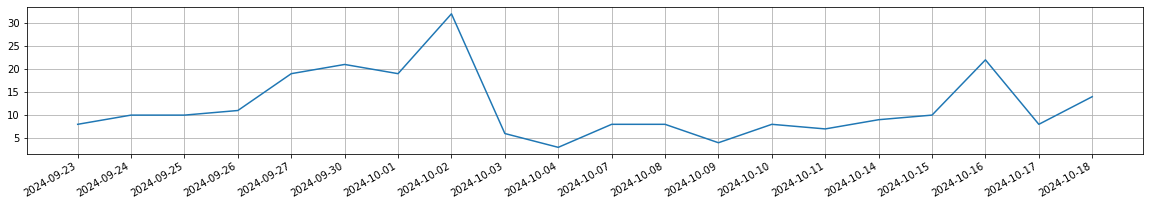

In [31]:
# gera_grafico(list_datas, d05_count)
gera_grafico(df_graficos['data'], df_graficos['qt_acoes_05'])

### Gráfico 10

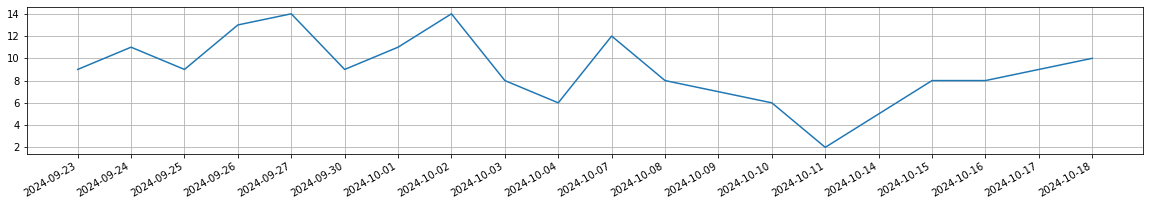

In [32]:
gera_grafico(df_graficos['data'], df_graficos['qt_acoes_10'])

### Gráfico 15

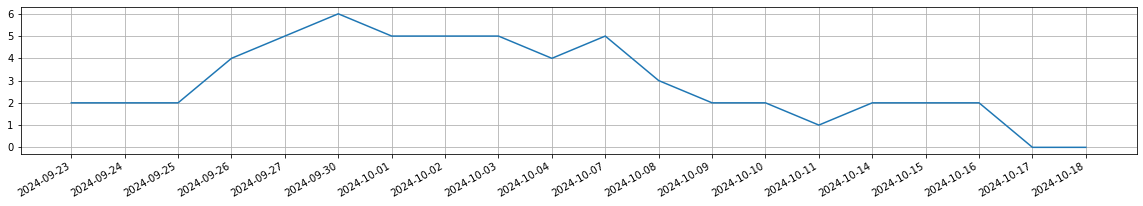

In [33]:
gera_grafico(df_graficos['data'], df_graficos['qt_acoes_15'])

### Gráfico 20

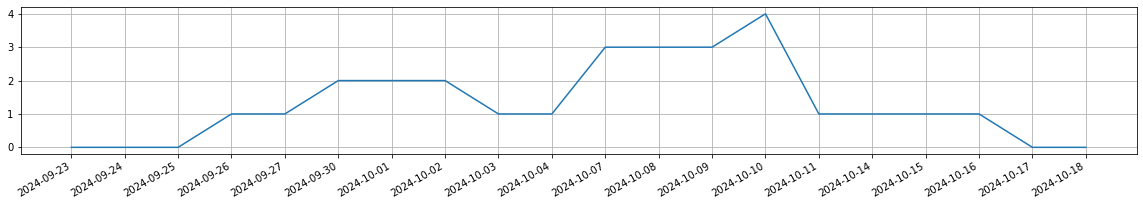

In [34]:
gera_grafico(df_graficos['data'], df_graficos['qt_acoes_20'])

### Gráfico 25

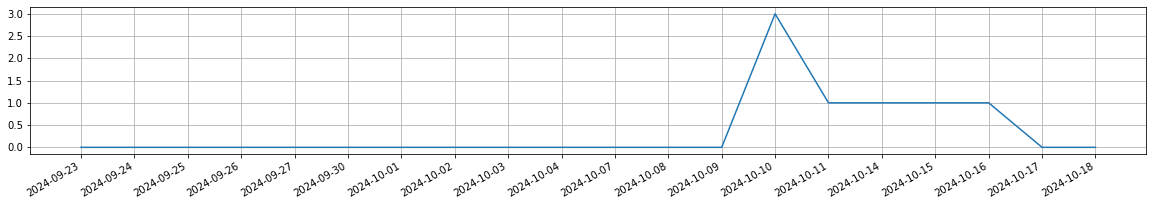

In [35]:
gera_grafico(df_graficos['data'], df_graficos['qt_acoes_25'])